In [1838]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [1839]:
dataset = '../datasets/winequality-red.xlsx'
df = pd.read_excel(dataset, header=1)

In [1840]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [1841]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [1842]:
df.index

RangeIndex(start=0, stop=1599, step=1)

In [1843]:
df.shape

(1599, 12)

In [1844]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

#### Missing values

In [1845]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Outliers

<Axes: >

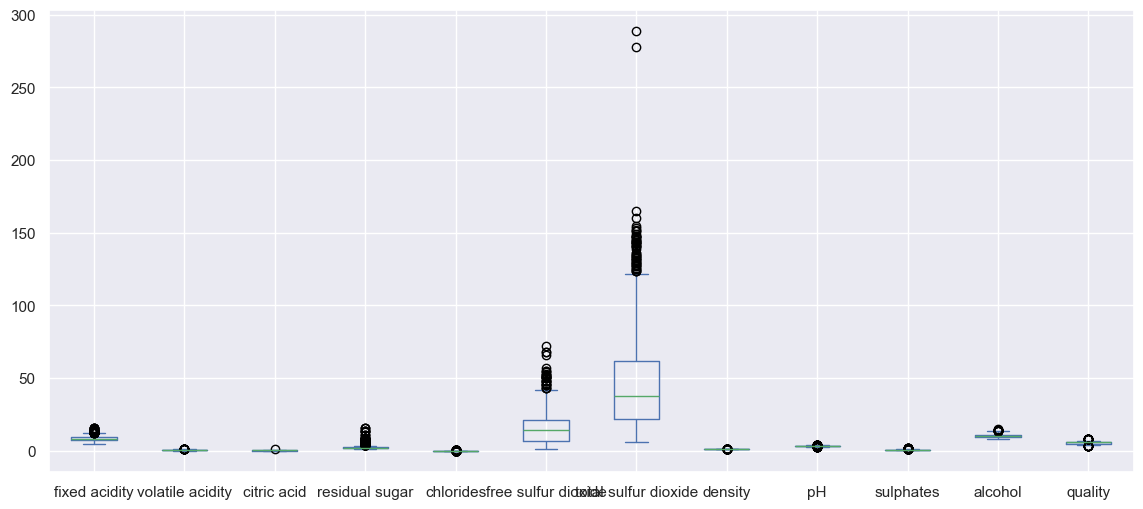

In [1846]:
df.plot(kind='box', figsize=(14,6))

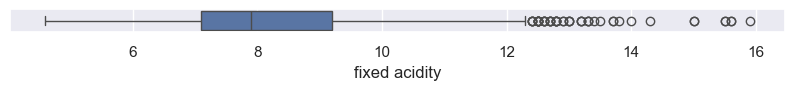

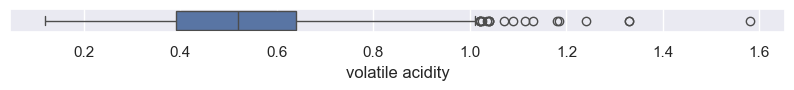

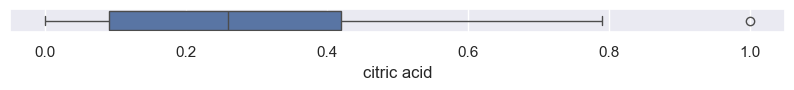

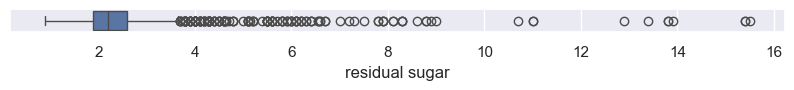

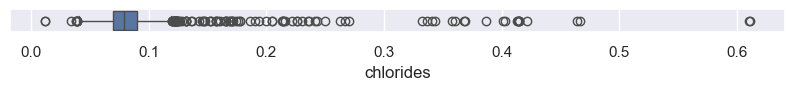

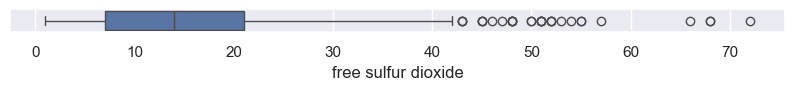

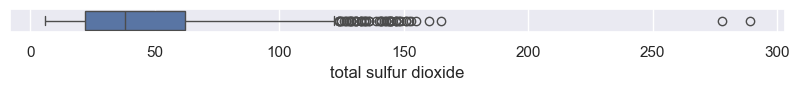

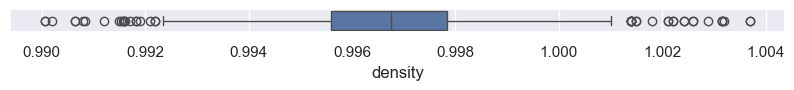

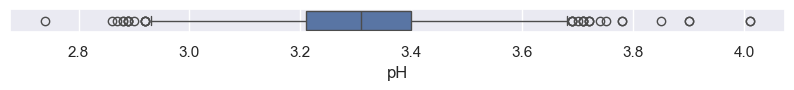

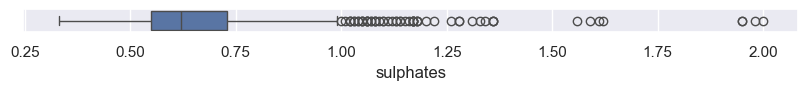

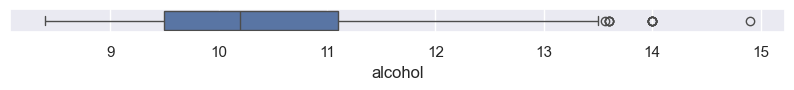

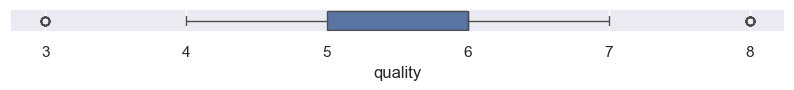

In [1847]:
for column in df:
    plt.figure(figsize=(10,0.3))
    sbn.boxplot(df[column], orient='h')
    

In [1848]:
print('Outliers')
for column in df:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    print(column + ':',IQR)

Outliers
fixed acidity: 2.0999999999999996
volatile acidity: 0.25
citric acid: 0.32999999999999996
residual sugar: 0.7000000000000002
chlorides: 0.01999999999999999
free sulfur dioxide: 14.0
total sulfur dioxide: 40.0
density: 0.002234999999999987
pH: 0.18999999999999995
sulphates: 0.17999999999999994
alcohol: 1.5999999999999996
quality: 1.0


In [1849]:
print('Upper and lower fence')
for column in df:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    Upper_Fence = Q1 - (1.5 * IQR)
    Lower_Fence = Q3 - (1.5 * IQR)
    print(column,Upper_Fence,Lower_Fence)

Upper and lower fence
fixed acidity 3.95 6.05
volatile acidity 0.015000000000000013 0.265
citric acid -0.4049999999999999 -0.07499999999999996
residual sugar 0.8499999999999996 1.5499999999999998
chlorides 0.04000000000000002 0.06000000000000001
free sulfur dioxide -14.0 0.0
total sulfur dioxide -38.0 2.0
density 0.9922475000000001 0.9944825
pH 2.925 3.115
sulphates 0.28000000000000014 0.4600000000000001
alcohol 7.1000000000000005 8.7
quality 3.5 4.5


In [1850]:
original_shape = df.shape

In [1851]:
for column in df:
    Q1 = df[column].quantile(0.25)  # Calculating quantiles for IQR
    Q3 = df[column].quantile(0.75)  # Calculating quantiles for IQR
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    df = df[~((df [column] < Lower_Fence) |(df[column] > Upper_Fence))]

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
